#**<font color = 'yellow'>Part I**
#**Exploration about colab</font>**

# Step1
##Creat a directory ~/Assignment/Assignment1 on my VM

In [2]:
import os

path= "/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment1"

if os.path.exists(path) == False:
  os.mkdir(path)

os.chdir(path)

#Step2
##read the"processed.cleveland.data" into a python and create a variable "cleveland_raw_data"which is a list of rows from this dataset. Each row should be a list of string values returned by the csv file reader.

In [3]:
labdir = "datamining"
import csv

with open("processed.cleveland.data") as csvfile:
    cleveland_raw_data = list(csv.reader(csvfile))

row_count = sum(1 for row in cleveland_raw_data)
print("There are ",row_count,"rows in the dataset")

There are  303 rows in the dataset


#Step3
##Data Cleaning

First we have to clean and sanitize the data. This data is pretty clean and is mostly numeric but contains some '?' in some fields. To make it easier to handle, we convert those fields to 'None'. For convenience, you should define a function "safefloat" that takes a string argument, and returns None if the argument is '?', otherwise the float value of the string.

In [4]:
import string

def safefloat(x):       # TODO: Implement safefloat()
  if x=='?':
    return None
  else:
    return float(x)    #float value of the string
cleveland_data = [[safefloat(x) for x in y] for y in cleveland_raw_data]

for i in range(len(cleveland_raw_data)): #From output below,the"?" has been transformed into "None"
  print (cleveland_data[i],)


[63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0, 0.0]
[67.0, 1.0, 4.0, 160.0, 286.0, 0.0, 2.0, 108.0, 1.0, 1.5, 2.0, 3.0, 3.0, 2.0]
[67.0, 1.0, 4.0, 120.0, 229.0, 0.0, 2.0, 129.0, 1.0, 2.6, 2.0, 2.0, 7.0, 1.0]
[37.0, 1.0, 3.0, 130.0, 250.0, 0.0, 0.0, 187.0, 0.0, 3.5, 3.0, 0.0, 3.0, 0.0]
[41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 2.0, 172.0, 0.0, 1.4, 1.0, 0.0, 3.0, 0.0]
[56.0, 1.0, 2.0, 120.0, 236.0, 0.0, 0.0, 178.0, 0.0, 0.8, 1.0, 0.0, 3.0, 0.0]
[62.0, 0.0, 4.0, 140.0, 268.0, 0.0, 2.0, 160.0, 0.0, 3.6, 3.0, 2.0, 3.0, 3.0]
[57.0, 0.0, 4.0, 120.0, 354.0, 0.0, 0.0, 163.0, 1.0, 0.6, 1.0, 0.0, 3.0, 0.0]
[63.0, 1.0, 4.0, 130.0, 254.0, 0.0, 2.0, 147.0, 0.0, 1.4, 2.0, 1.0, 7.0, 2.0]
[53.0, 1.0, 4.0, 140.0, 203.0, 1.0, 2.0, 155.0, 1.0, 3.1, 3.0, 0.0, 7.0, 1.0]
[57.0, 1.0, 4.0, 140.0, 192.0, 0.0, 0.0, 148.0, 0.0, 0.4, 2.0, 0.0, 6.0, 0.0]
[56.0, 0.0, 2.0, 140.0, 294.0, 0.0, 2.0, 153.0, 0.0, 1.3, 2.0, 0.0, 3.0, 0.0]
[56.0, 1.0, 3.0, 130.0, 256.0, 1.0, 2.0, 142.0, 1.0, 0.6, 2.0, 1

As discussed in the dataset summary, the following are the column names.

In [5]:
headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Now we construct a dictionary mapping these header names to the column numbers 0...13:

In [6]:
headernum = dict(zip(headers, range(len(headers))))
print(headernum)

{'age': 0, 'sex': 1, 'cp': 2, 'trestbps': 3, 'chol': 4, 'fbs': 5, 'restecg': 6, 'thalach': 7, 'exang': 8, 'oldpeak': 9, 'slope': 10, 'ca': 11, 'thal': 12, 'num': 13}


#Step 4
##Define a function "getcol" that takes a column name and returns the data in that column as a list of numbers.

In [7]:
def getcol(name): # TODO write getcol
  return list(map(float,[x[headernum[name]]for x in cleveland_data]))

#Step5
##Basic Statistics
##What is the minimum, maximum, mean and standard deviation of the age of this set of subjects? Use the numpy package with contains the mean() and std() functions.

In [8]:
import numpy as np
age = getcol('age')
[min(age), max(age), np.mean(age), np.std(age)]

[29.0, 77.0, 54.43894389438944, 9.02373483119838]

Next we define a function select which given a column name and a predicate, returns the values of that column at rows for which the predicate is true.

In [9]:
def select(colname, predicate):
  icol = headernum[colname]
  return [i[icol] for i in cleveland_data if predicate(i)]

Now run these expressions to get the mean age of male and female subjects.

In [10]:
def fieldis(colname, cval):
  icol = headernum[colname]
  return lambda x: x[icol] == cval

[np.mean(select('age', fieldis('sex',1))), np.mean(select('age', fieldis('sex',0)))]

[53.83495145631068, 55.72164948453608]

#Step6
##Histograms of Data Fields


Plot histograms of age and resting blood pressure

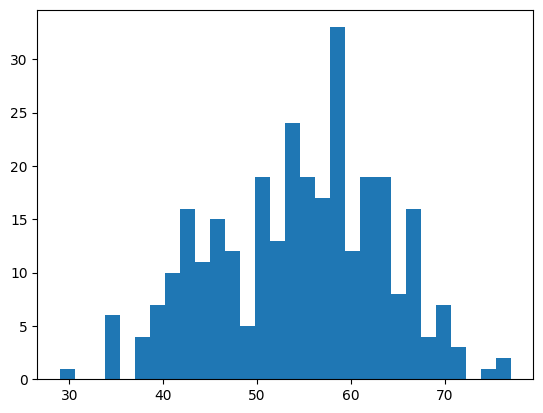

In [11]:
import pylab
%matplotlib inline

h1 = pylab.hist(age,30)

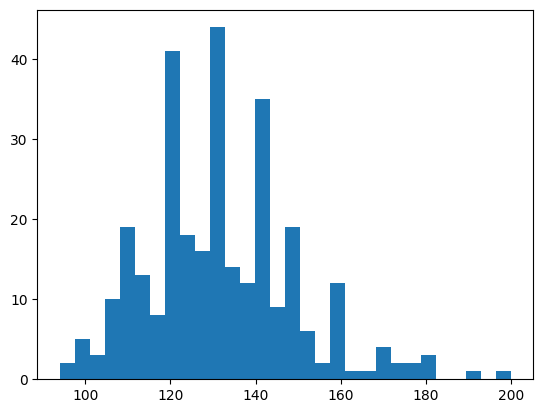

In [12]:
bp = getcol('trestbps')
h2 = pylab.hist(bp, 30)

>TODO Describe the rough shape of the distribution of bps. Is it skewed?

###*We choose too much bins for python to draw the histogram, that makes the shape of the distribution of bps weird. But if we change the bins into 10, the graph becomes more focused. Also, Review the histogram as follows, It performs a little bit like Skewed-Right Distribution, but it should be a<font color=FF0000> Normal Distribution </font> with respect to the x-axis range.*

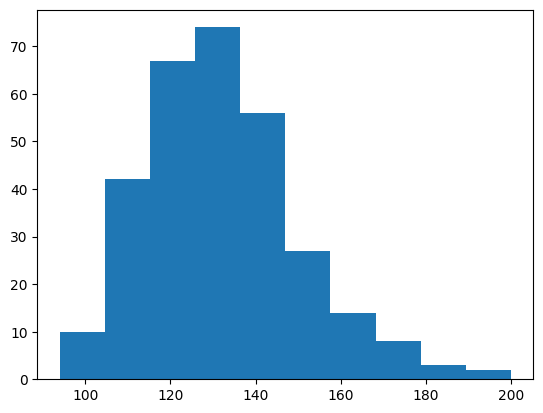

In [13]:
bp = getcol('trestbps')
h2 = pylab.hist(bp, 10)

#Step7
##Scatter Plots

Make scatter plots of:
*   age vs bp (resting blood pressure)
*   age vs thalach (max heart rate)

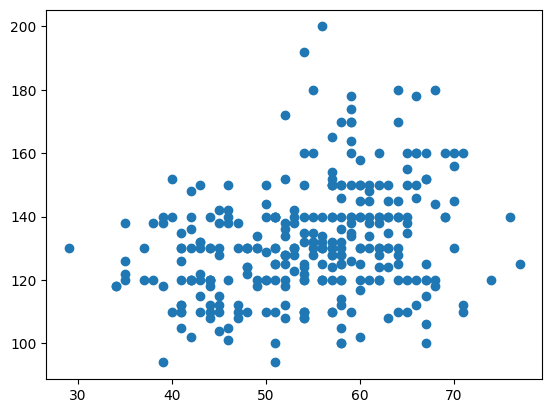

In [14]:
pylab.scatter(age, bp)

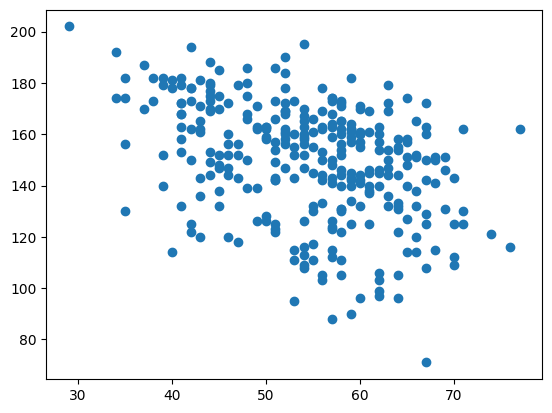

In [ ]:
maxhr = getcol('thalach')
pylab.scatter(age, maxhr)

We can augment the basic scatter plots with other information that might be relevant. In the plot below, we used the 'num' field to color the dots. num is an integer indicating the degree of heart disease from 0...4. We also make the dots larger with the s= argument to make the colors easier to see.

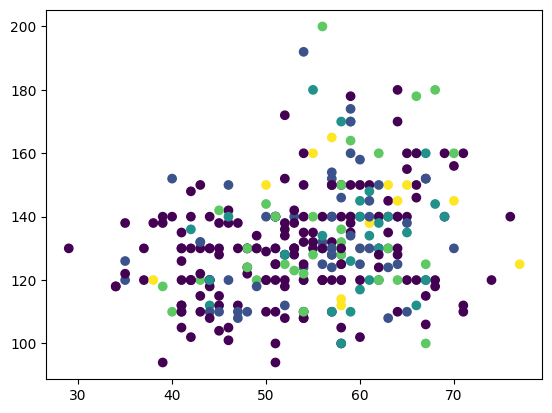

In [15]:
pylab.scatter(age, bp, c=getcol('num'))

To figure out what color encodes what value, we can do a simple plot of the values 0...4

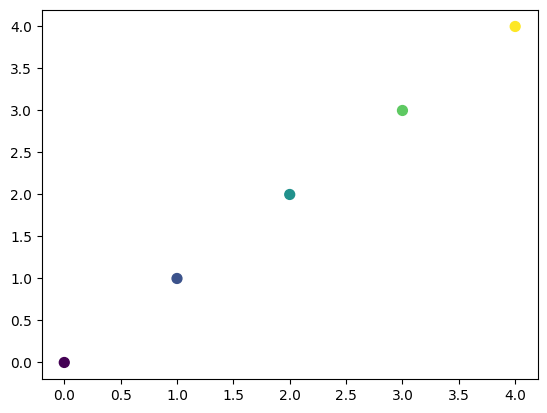

In [ ]:
pylab.scatter(range(5), range(5), c=range(5), s=50)

>TODO: What do you notice about the distribution of num = 2 diagnoses?
###*The distribution of Num = 2 is equivalent to the <font color=darkgreen> **dark-green plots's distribution**</font>*
###*That is in num = 2 diagnoses, age has a certain impact on blood pressure, well approximate* <font color=red>***Increasing relationship***</font>
###*I am trying to split all the num = 2 into a new scatter to show the distribution clearer.*
*Please review as follows.*


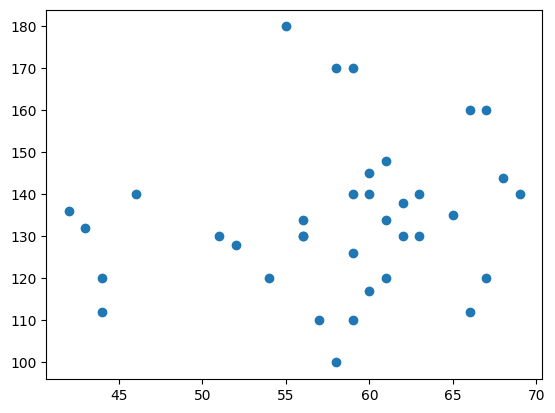

In [ ]:
age2 = select('age', fieldis('num',2))
bp2 = select('trestbps', fieldis('num',2))
pylab.scatter(age2, bp2)

These scatter plots seem to show trends. To make those clearer we can overlay regression lines. The regression line minimizes the total squared vertical distance from the line to the data points, and shows the general trend for the data.

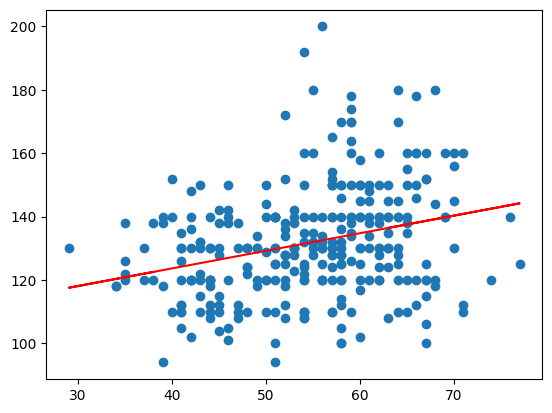

In [ ]:
# for numpy we need arrays instead of lists of values
age = np.array(getcol('age'))
bp = np.array(getcol('trestbps'))

pylab.scatter(age, bp)
m, b = np.polyfit(age, bp, 1)
pylab.plot(age, m*age + b, '-', color='red')

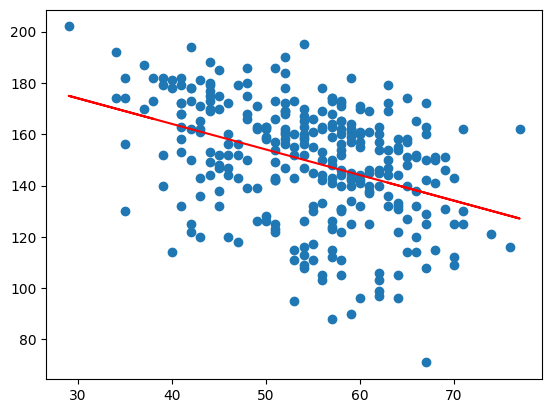

In [ ]:
maxhr = np.array(getcol('thalach'))

pylab.scatter(age, maxhr)
m, b = np.polyfit(age, maxhr, 1)
pylab.plot(age, m*age + b, '-', color='red')

#Step8
##Critical Thinking with Data

The following scatter plot and regression line shows the relationship between blood pressure (X-axis) and heart disease (Y-axis).

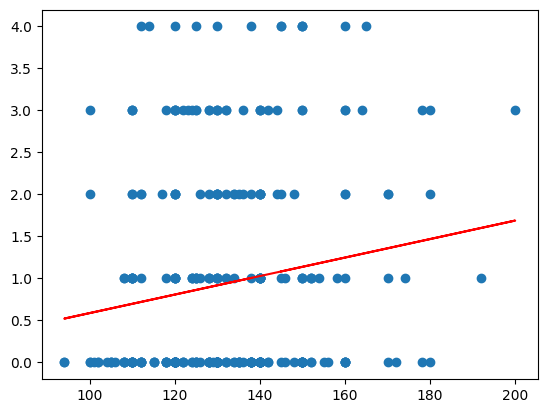

In [ ]:
num = np.array(getcol('num'))
factor = bp

pylab.scatter(factor, num)
m, b = np.polyfit(factor, num, 1)
pylab.plot(factor, m*factor + b, '-', color='red')

>TODO: Based on this plot, do you think blood pressure influences heart disease?

*I would say there is* <font color = red>***no influences.***</font> *The scatter cloud is concentrated within the <font color = red>normal distribution of blood pressure.</font>*

Now consider this plot of age versus num:

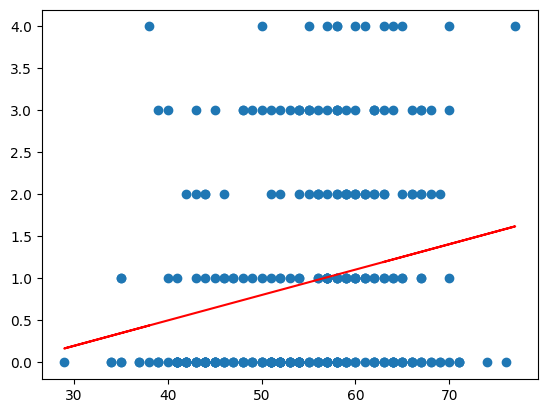

In [ ]:
num = np.array(getcol('num'))
factor = age

pylab.scatter(factor, num)
m, b = np.polyfit(factor, num, 1)
pylab.plot(factor, m*factor + b, '-', color='red')

>TODO: Based on this plot of Age vs Num and the previous plot of Age vs BPS, what would you say now about the relation between BPS and Num?

*When the num = {0,1,3}, the scatter accounts for the age distribution; when num = {2,4}, there is nearly an increasing relationship between age and num. Meanwhile,from the previous plot of Age vs BPS, we know that as age rises, bps will follow then. Such that there should be an <font color=red>**increasing relation**</font> between BPS and Num when num = {2,4}.*

#Step9
##Dimension Reduction

Recall that dimension reduction allows you to look at the dominant factors in high-dimensional data. Matplotlib includes the PCA function for this purpose. You use it like this:

In [17]:
import numpy as np
from sklearn.decomposition import PCA

cleveland_matrix = np.array(cleveland_data, dtype=np.float64) # First put the data in a 2D array of double-precision floats
results = PCA(n_components=2)
results.fit(cleveland_matrix[:,0:8])
yy = results.fit_transform(cleveland_matrix[:,0:8])  #cleveland_matrix[:,0:8] leave out columns with None in them
print(yy)                        # yy is the projections of the data into the principal component directions

[[-1.26663589e+01  2.75041041e+00]
 [ 4.12980230e+01  4.53033791e+01]
 [-1.76836280e+01  2.14901158e+01]
 [ 2.40107271e+00 -3.99451191e+01]
 [-4.32887032e+01 -2.38292150e+01]
 [-1.13131798e+01 -2.85520079e+01]
 [ 2.19402338e+01 -8.25047506e+00]
 [ 1.06546632e+02 -1.55610793e+01]
 [ 7.54927709e+00  3.81732598e+00]
 [-4.32565533e+01 -3.94925489e+00]
 [-5.40611890e+01  3.78392383e+00]
 [ 4.76806343e+01 -2.93120306e+00]
 [ 9.29389085e+00  7.39709177e+00]
 [ 1.51899828e+01 -2.62608650e+01]
 [-4.57062403e+01 -7.58006376e+00]
 [-7.76066302e+01 -2.02204580e+01]
 [-1.90733742e+01 -2.11551250e+01]
 [-7.31665820e+00 -9.24011570e+00]
 [ 2.79544264e+01  8.57310990e+00]
 [ 1.88880404e+01 -2.24028837e+01]
 [-3.63272045e+01  5.48174903e+00]
 [ 3.72494154e+01 -1.01597598e+01]
 [ 3.67403995e+01 -1.13487515e+01]
 [-2.25797172e+01 -2.18322409e+01]
 [-4.04123955e+01  1.87070221e+01]
 [-2.84310332e+01 -9.79715990e+00]
 [ 9.25783602e+01 -2.39702660e+01]
 [-1.91547335e+01  3.91164304e+01]
 [ 7.08134557e-01 -2

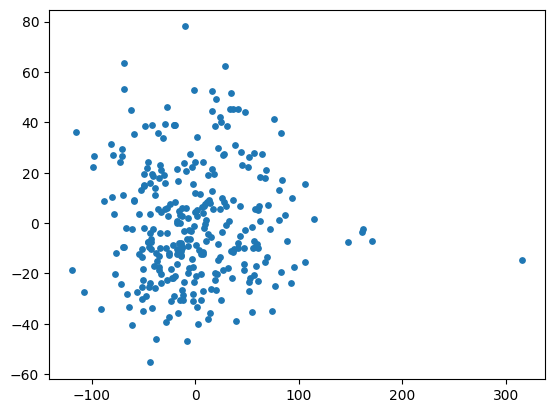

In [18]:
pylab.scatter(yy[:,0],yy[:,1],s=15)

>TODO: Do you see a relationship between the two main variables (X and Y axes of this plot)?

*Regardless about the num, The relationship between X and Y should be **weeker than |0.25|.**I mean it should be **no relation** within them. Also, it is a scatter with outliers*

#Step10
##Text Data

Download the NY times Dataset from here https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/docword.nips.txt.gz and save it to your lab2 directory. Unzip the file, producing docword.nips.txt.

This file has 3 header lines: num docs, num distinct words, num total words. The following lines represent the documents with three fields:

docid wordid wordcount

We can read the file with a csv reader:



In [ ]:
import csv
with open("/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment1/docword.nips.txt") as csvfile:
    ndocs = int(csvfile.readline())
    nwords = int(csvfile.readline())
    nnz = int(csvfile.readline())
    nips_raw_data = list(csv.reader(csvfile, delimiter=' '))
    #nips_data = []
    #csv_reader = csv.reader(csvfile,delimiter=' ')
    #for line in csvfile.readlines():
      #line = line.strip('\n')
      #nips_data.extend(int(x) for x in line.split())

nips_data = [[int(x) for x in y] for y in nips_raw_data] # convert from string to numeric data



In [ ]:
[ndocs, nwords, nnz]

[1500, 12419, 746316]

Now we're going to create an array 'counts' containing the counts for each word over all documents. Note that we use 'row[1]-1' as the index. The docword files use 1-based array indexing, but python uses zero-based indexing.

In [ ]:
counts = [0] * nwords

for row in nips_data:
    counts[row[1]-1] += row[2] # increment the count for this word by the value in the third column
print(counts)

[8, 20, 67, 14, 10, 14, 12, 83, 14, 11, 10, 63, 10, 7, 101, 699, 15, 998, 39, 8, 10, 41, 12, 12, 11, 11, 20, 11, 22, 246, 41, 340, 23, 11, 17, 32, 16, 29, 1652, 15, 108, 79, 12, 11, 134, 224, 61, 19, 23, 18, 15, 114, 30, 18, 127, 86, 10, 32, 123, 38, 21, 272, 21, 32, 14, 42, 10, 10, 21, 27, 58, 138, 18, 28, 62, 1140, 803, 67, 47, 30, 52, 97, 17, 28, 64, 14, 40, 1010, 477, 249, 14, 45, 13, 63, 555, 795, 11, 153, 91, 0, 91, 47, 91, 30, 632, 48, 286, 134, 17, 64, 633, 52, 11, 56, 75, 15, 11, 148, 19, 338, 11, 19, 17, 24, 70, 2318, 14, 30, 71, 295, 37, 32, 1997, 1059, 43, 381, 2073, 222, 10, 804, 445, 43, 26, 16, 47, 227, 20, 48, 35, 262, 12, 17, 27, 777, 191, 76, 15, 1567, 57, 13, 5, 12, 18, 447, 591, 0, 11, 39, 402, 143, 927, 878, 85, 388, 11, 535, 31, 172, 126, 45, 21, 9, 72, 122, 36, 7, 17, 15, 192, 13, 41, 193, 157, 215, 116, 89, 24, 10, 70, 61, 46, 97, 98, 26, 10, 71, 42, 13, 109, 187, 980, 603, 58, 320, 84, 7, 37, 8, 16, 11, 14, 21, 4, 19, 11, 20, 307, 116, 51, 224, 177, 13, 13, 77,

Next we zip the word index as the first column, and sort this table by word count in descending order.

In [ ]:
import operator
wordtab = sorted(zip(range(nwords), counts), key=lambda x: x[1], reverse=True)
#wordtab.sorted(key=lambda x: x[1], reverse=True)

The top (first) values in this list are the most frequent word ids (first column), and their counts (second column):

In [ ]:
wordtab[0:8]

[(7357, 25977),
 (7010, 18665),
 (6119, 16075),
 (4269, 14704),
 (5398, 13993),
 (7364, 12667),
 (10002, 11677),
 (315, 11250)]

Now grab the vocabulary file for nips: https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.nips.txt and save it to lab2. Run the following to load it and create a dictionary (word -> wordid) and inverse dictionary (wordid -> word) from it.

In [ ]:
mydict = {}            # word dictionary
words = [''] * nwords  # invese dictionary - just an array of strings
i = 0
with open("/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment1/vocab.nips.txt") as txtfile:
    for line in txtfile:
        word = line.rstrip('\n')
        mydict[word] = i
        words[i] = word
        i += 1

Now we can find the top words using the inverse dictionary:

In [ ]:
topwords = [words[x] for x,y in wordtab[0:10]]
topwords

['network',
 'model',
 'learning',
 'function',
 'input',
 'neural',
 'set',
 'algorithm',
 'system',
 'data']

>TODO: What do you think is the topic of the NIPS dataset?

*It's related to neural network systems, it achieves intelligent functions from training model by deep leanring, which is a method to process information automatically from experience-data inputs by computer algorithms.*

Finally, we can plot the counts words in rank order (decreasing order of frequency).

1


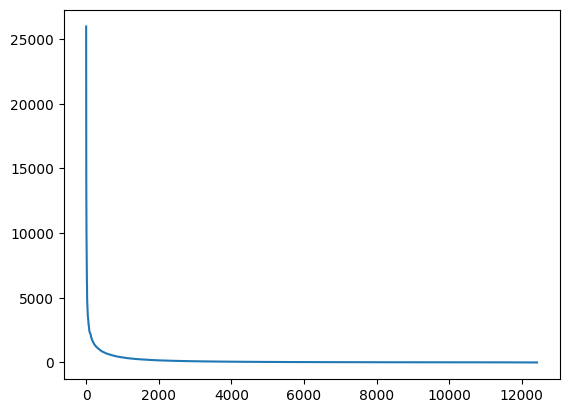

In [ ]:
import pylab
%matplotlib inline
scounts = [y for x,y in wordtab]
pylab.plot(scounts)

What form does this curve have? To make it clearer, lets to a log-log plot.

*I would say it looks like a exponential function*

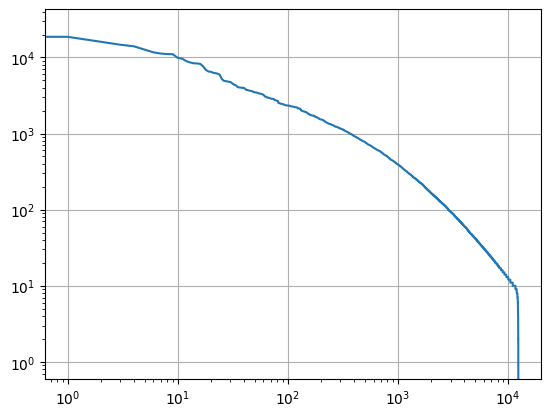

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pylab.loglog(scounts)
plt.grid()

>TODO: What is the approximate slope (in log-log space) of this curve over the frequency range 10^1 to 10^3 ?

*please look at the ployfit result as follows, over the frequency range 10^1 to 10^3, I think is well approximate <font color='red'>-10 to -9</font>*

            9             8             7            6            5
-3.367e-30 x + 1.993e-25 x - 4.992e-21 x + 6.88e-17 x - 5.69e-13 x
              4             3           2
 + 2.886e-09 x - 8.809e-06 x + 0.01524 x - 13.23 x + 4534


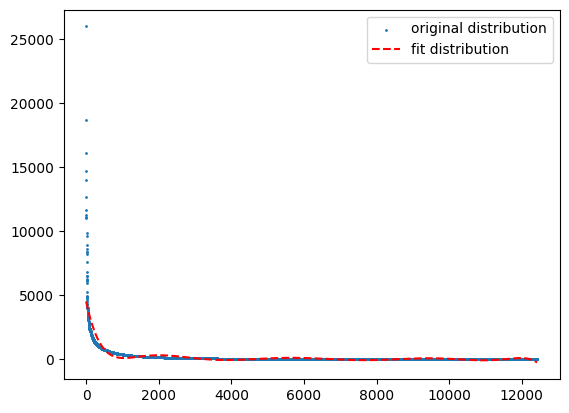

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#slinespace=range(len(scounts))
i = 0
slinespace = []
for i in range(len(scounts)):
  i += 1
  slinespace.append(i)

#output fit function
#slop in loglog corresponds to the exponent in real
coef = np.polyfit(slinespace,scounts,9)
y_fit = np.poly1d(coef)
y = y_fit(slinespace)
print(y_fit)

#comparison betwwen original distribution and fit distribution
plt.scatter(slinespace,scounts,marker='o',label="original distribution",s=1)
plt.plot(slinespace,y,ls='--',c='red',label="fit distribution")
plt.legend()
plt.show()



#**<font color = 'yellow'>PART II**
#**Reservoir Sampling</font>**

In [2]:
import random
import multiprocessing
import torch

from collections import Counter


class Reservoir:
    # reservoir
    pool = list()
    #sample size: account for the index of received data
    index = 0

    def __init__(self, pool_capacity: int):
        #pool size: pool_capacity
        self.pool_capacity = pool_capacity

    def receive_data(self, data: str or int):
        """ accept data and sample """
        #When i<=k, the element enters the pool directly, and the probability of each element entering the pool is 1
        if self.index < self.pool_capacity:
            self.pool.append(data)
        #When i>k, elements in the pool will be randomly replaced by new element
        #Every element of dataset within the probability of sample_size/dataset_size(pool_capacity/dataset_size) to stay in pool
        else:
            d_index = random.randint(0, self.index)
            if d_index in range(0, self.pool_capacity):
                self.pool[d_index] = data

        self.index += 1

    #release instance
    def _del_(self):
        del self.pool[0:self.index]
        self.index = 0

def test_reservoir_with_dataset(sample_size,dataset_size,iterator):
    #dataset size: how many data in the stream
    dataset = range(1,dataset_size+1)

    #sample size: param->pool_capacity
    resN = [Reservoir(sample_size) for i in range(iterator)]
    samples = list()
    #using itertor to repeat the reservoir sampling,
    for i in range(iterator):
        for d in dataset:
            resN[i].receive_data(d)
        samples.extend(resN[i].pool)
        print("reservoir sampling",i+1,":",resN[i].pool)
        resN[i]._del_()

    #Check whether probability is uniform
    r = Counter(samples)
    print(r)
    return r

def test_with_GPU(sample_size,dataset_size,iterator):
    for i in range():
        test_reservoir_with_dataset(sample_size,dataset_size,iterator)

if __name__ == '__main__':
    #test_reservoir_with_dataset(4,10,100000000)
    print(multiprocessing.cpu_count())




2
